<a href="https://colab.research.google.com/github/francji1/01DAS/blob/main/timeseries/DAS_Time_Series_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Time series


## Where to go if I want to know ...

* Classical Time Series Analysis courses and books (based on R)
 * Forecasting: Principles and Practice: https://otexts.com/fpp2/
 * A Very Short Course on Time Series Analysis: https://bookdown.org/rdpeng/timeseriesbook/
 * Pennstate course STAT 510 Applied Time Series Analysis: https://online.stat.psu.edu/stat510/lesson/1
 * TS course from mlcollege and Dusan Fedorcak: https://github.com/mlcollege/time-series-analysis/tree/master/src

* Classical TS approach
 * statsmodel https://www.statsmodels.org/stable/tsa.html
 * Prophet https://facebook.github.io/prophet/docs/quick_start.html

* TS Feature Engeneering
 * tsfresh https://tsfresh.readthedocs.io/en/latest/text/introduction.html
 * machinelearningmastery https://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/

* Machine Learnign approach
  * Machinelearningmastery https://machinelearningmastery.com/?s=Time+Series&post_type=post&submit=Search
  * DARTS https://unit8co.github.io/darts/examples/01-darts-intro.html (https://github.com/unit8co/darts/tree/master/examples) (https://unit8.com/resources/darts-time-series-made-easy-in-python/)
  * General ML: scikit-learn/keras/...
  *

* TS and AutoML Libraries
  * https://medium.com/data-science-at-microsoft/python-open-source-libraries-for-scaling-time-series-forecasting-solutions-3485c3bd8156
  * https://www.kaggle.com/andreshg/automl-libraries-comparison/notebook
  * https://medium.com/swlh/8-automl-libraries-to-automate-machine-learning-pipeline-3da0af08f636

  * https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
  * https://github.com/mljar/mljar-supervised#mljar


In [1]:
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from functools import reduce
import numpy as np
import matplotlib
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
path = '/content/drive/My Drive/01DAS/data/bike_share_hour.csv'
#data = pd.read_csv(path, parse_dates=True, index_col='Month', date_parser=lambda x: datetime.strptime(x, '%Y-%m'))
data = pd.read_csv(path)
ts = data['cnt']
#data

In [ ]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


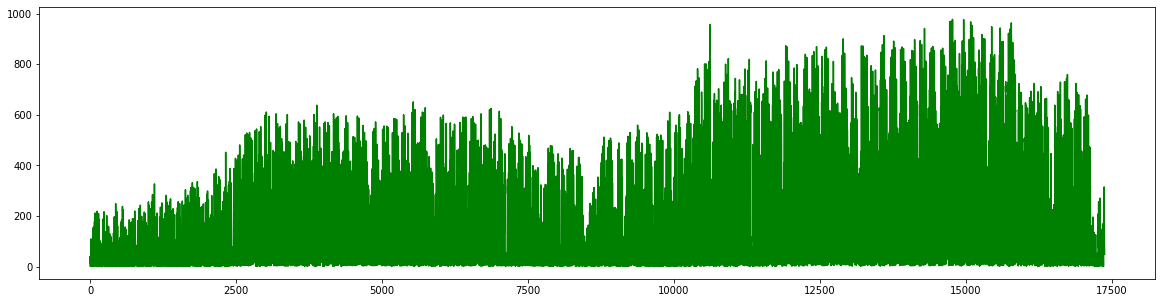

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(ts, 'g-')
plt.show()

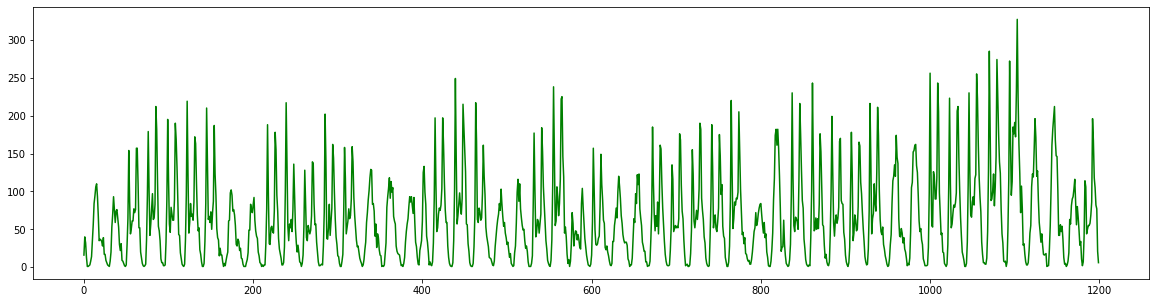

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(ts[0:1200], 'g-')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


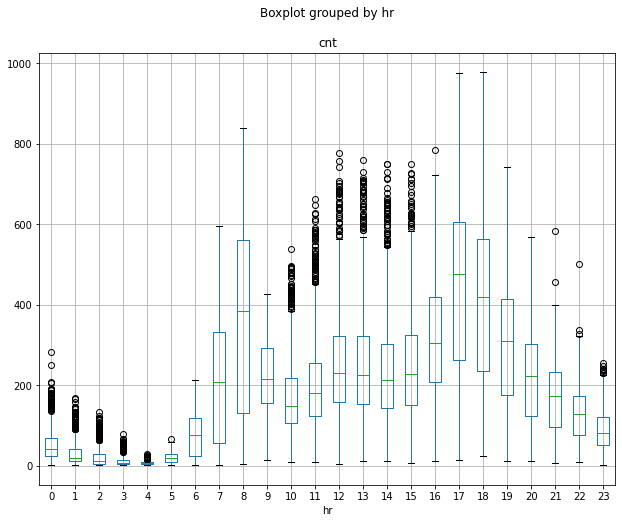

In [ ]:
# create a boxplot of monthly data
from pandas import Grouper
from matplotlib import pyplot
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
#data.boxplot(column=['cnt'], by='mnth', ax=ax)
data.boxplot(column=['cnt'], by='hr', ax=ax)

In [ ]:
!pip install darts


In [ ]:
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score
from darts.datasets import EnergyDataset

from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    RegressionEnsembleModel,
    RegressionModel,
    Theta,
    FFT
)

from darts.metrics import mape, mase
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis, plot_hist
from darts.datasets import AirPassengersDataset

In [ ]:
# Create a TimeSeries, specifying the time and value columns

data['DateTime'] = pd.to_datetime(data.dteday.map(str) + " " + data.hr.map(str) + ":00:00")
#data.head()
series = TimeSeries.from_dataframe(data.head(1000), 'DateTime', 'cnt',fill_missing_dates=True, freq='D')

series.head()

series = TimeSeries.from_dataframe(data.head(1000), 'instant', 'cnt')

# Set aside the last 100 hours as a validation series
train, val = series[:-100], series[-100:]

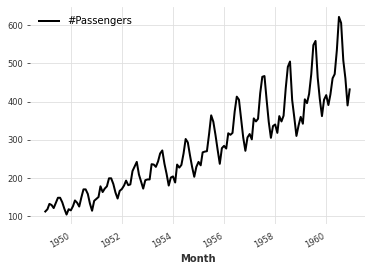

In [ ]:
from darts.datasets import AirPassengersDataset
series2 = AirPassengersDataset().load()
series2.plot()

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,DateTime
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [ ]:
#data2['DateTime'] = data[['yr', 'mnth', 'Day', 'Hour']].apply(lambda s: datetime.datetime( * s), axis = 1)
data['DateTime'] = pd.to_datetime(data.dteday.map(str) + " " + data.hr.map(str) + ":00:00")
data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,DateTime
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [ ]:
data["DateTime"].max() - data["DateTime"].min()

Timedelta('730 days 23:00:00')

In [ ]:
data.isna().any()
data.dtypes

instant                int64
dteday                object
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
DateTime      datetime64[ns]
dtype: object

In [ ]:

from darts.datasets import EnergyDataset
df = EnergyDataset().load().pd_dataframe()
df.head()

component,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


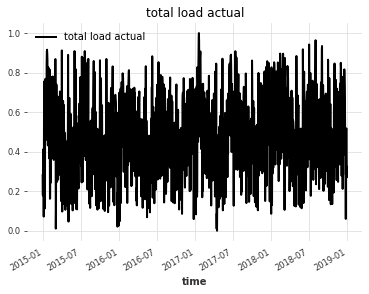

In [ ]:
df_day_avg = df.groupby(df.index.astype(str).str.split(" ").str[0]).mean().reset_index()
filler = MissingValuesFiller()
scaler = Scaler()
series = scaler.fit_transform(
    filler.transform(
        TimeSeries.from_dataframe(
            df_day_avg, 'time', ['total load actual'])
    )
)
series.plot()
plt.title('Total load actual');

In [ ]:
train, val = series.split_after(pd.Timestamp('20170901'))
series.head()

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[0.28104349]],

       [[0.17862946]],

       [[0.41129916]],

       [[0.26029768]],

       [[0.40525958]]])
Coordinates:
  * time       (time) datetime64[ns] 2014-12-31 2015-01-01 ... 2015-01-04
  * component  (component) object 'total load actual'
Dimensions without coordinates: sample

In [ ]:


def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(8,5))
    if (start_date):
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label='actual')
    pred_series.plot(label=('historic ' + forecast_type + ' forecasts'))
    plt.title('R2: {}'.format(r2_score(ts_transformed.univariate_component(0), pred_series)))
    plt.legend();



In [ ]:
from darts.models import NBEATSModel

model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name='nbeats_run'
)

model_nbeats.fit(train)
prediction = model_nbeats.predict(len(val), num_samples=1000)

[2021-12-06 21:25:48,220] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 940 samples.
[2021-12-06 21:25:48,220] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 940 samples.
[2021-12-06 21:25:48,367] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2021-12-06 21:25:48,367] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


100%|██████████| 97/97 [00:02<00:00, 38.20it/s]


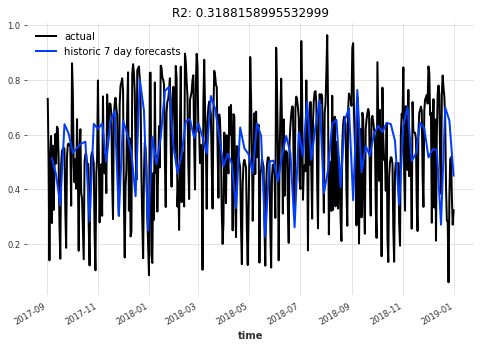

In [ ]:
pred_series = model_nbeats.historical_forecasts(
    series,
    start=pd.Timestamp('20170901'),
    forecast_horizon=1,
    stride=5,
    retrain=False,
    verbose=True
)
display_forecast(pred_series, series, '7 day', start_date=pd.Timestamp('20170901'))

In [ ]:
model_nbeats.fit(train, val_series=val, verbose=True)

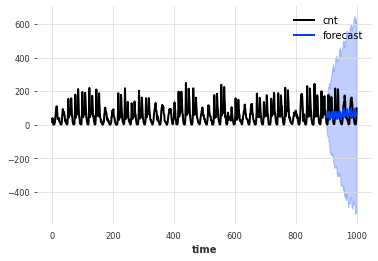

In [ ]:
series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()